**Linear regression with one variable from scratch**

While studying Machine Learning basics I\`ve decided to implement Linear Regression algorithm from scratch so that I\`ll know that I understood the topic properly.

At first let\`s import all libraries that we need for this task:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now  let\'s remember Linear Regression\`s formula:
$$\begin{align*} \newline f_{w,b}(x^{(i)}) = wx^{(i)} + b  \newline \end{align*} $$
Here we have:
$x$ - our variable,feature;
$y$ - target;
$w$ and $b$ - parameter\'s to be adjusted in the process of training.

Then let\'s generate $x$ and $y$ data for training and vizualize it:

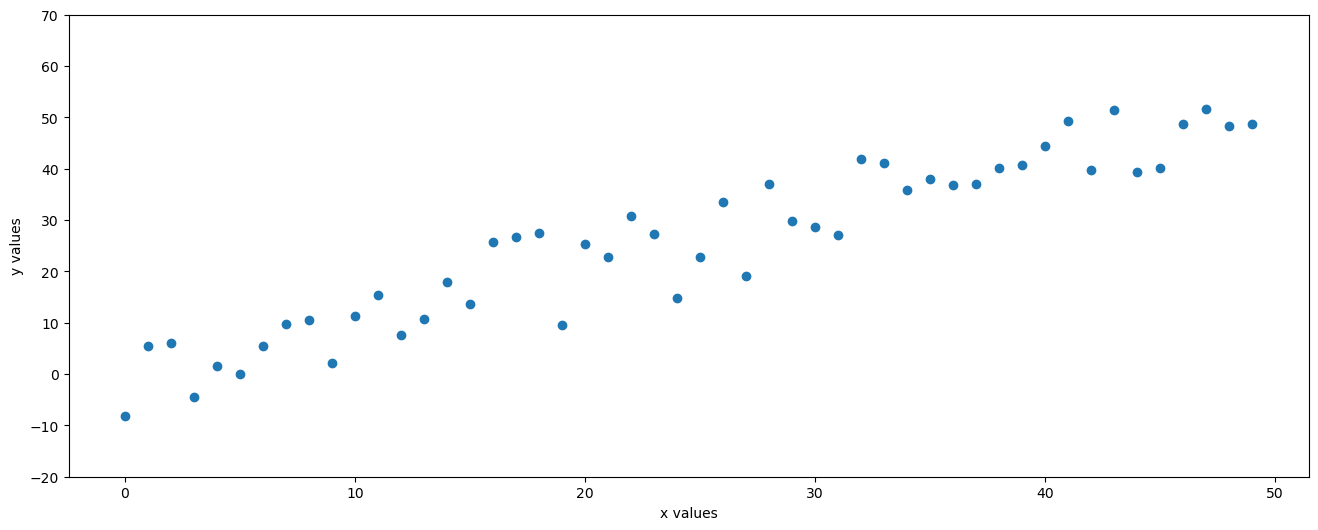

In [2]:
x = np.arange(50)
delta = np.random.uniform(-10,10, size=(50,))
y = x + delta


plt.figure(figsize=(16,6))
plt.xlabel("x values")
plt.ylabel("y values")
plt.ylim([-20,70])
plt.scatter(x,y)

To train our linear regression model means - to find minimum value of a cost function. We will use a Squared Error Cost Function for this purpose
$$\begin{align*}J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \end{align*}$$ 
Let\'s write a funtion for it: 

In [3]:
def cost_func(x_arr,y_arr,bias, weight):
    
    m = x_arr.shape[0]
    total_cost = 0

    for i in range(m):
        pred = bias+weight*x_arr[i]
        y = y_arr[i]
        cost = (pred-y)**2
        total_cost += cost
    return total_cost/(2*m)

To find a minimum value for $J(w,b)$ we will use a Gradient Descent for finding tha appropriate values for our parammeters - $w$ and $b$.
To implement a Gradient Descent we need to create a loop that runs untill cost function reaches it\`s minimum. And one iteration will be:$$\begin{align*}  \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}\; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline
\newline \end{align*} $$
Here we have $\alpha$ - learning rate, for now we will hardcode it. And also we have partial derivatives:$$\begin{align*}  \newline 
\;  \frac{\partial J(w,b)}{\partial w} \; \newline
\frac{\partial J(w,b)}{\partial b}  \newline \newline
\end{align*}$$
These are characterizing direction and rate of step (describing a slope of the function in the particular point). They are defined as:
$$\begin{align*} \newline
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})\\
\newline \end{align*}$$
Let's write corresponding fuctions for partial derivatives and Gradient Descent itself:

In [4]:
def derivative_J_b(x_arr,y_arr,bias, weight):
    m = x_arr.shape[0]
    total_cost = 0

    for i in range(m):
        pred = bias + weight * x_arr[i]
        y = y_arr[i]
        cost = pred - y
        total_cost += cost
    return (total_cost / m)


In [5]:
def derivative_J_w(x_arr,y_arr,bias, weight):
    m = x_arr.shape[0]
    total_cost = 0
    
    for i in range(m):
        pred = bias + weight * x_arr[i]
        y = y_arr[i]
        cost = (pred - y) * x_arr[i]
        total_cost += cost
    return (total_cost / m)

In [6]:
# gradient descent
def grad_descent(x_array,y_array,bias_start,weight_start):
    old_cost = cost_func(x_array,y_array,bias_start,weight_start)
    alpha = 0.0001
    convergence = False

    bias = bias_start
    weight = weight_start

    while convergence == False:
        temp_bias = bias - alpha * derivative_J_b(x_array,y_array,bias,weight)
        temp_weight = weight - alpha * derivative_J_w(x_array,y_array,bias,weight)
        new_cost = cost_func(x_array,y_array,temp_bias,temp_weight)
        if new_cost >= old_cost:
            convergence = True
        else:
            weight = temp_weight
            bias = temp_bias
            old_cost = new_cost
    return bias, weight

And now let\'s define our parameters $w$ and $b$ , train our model and vizualize the resulting line:

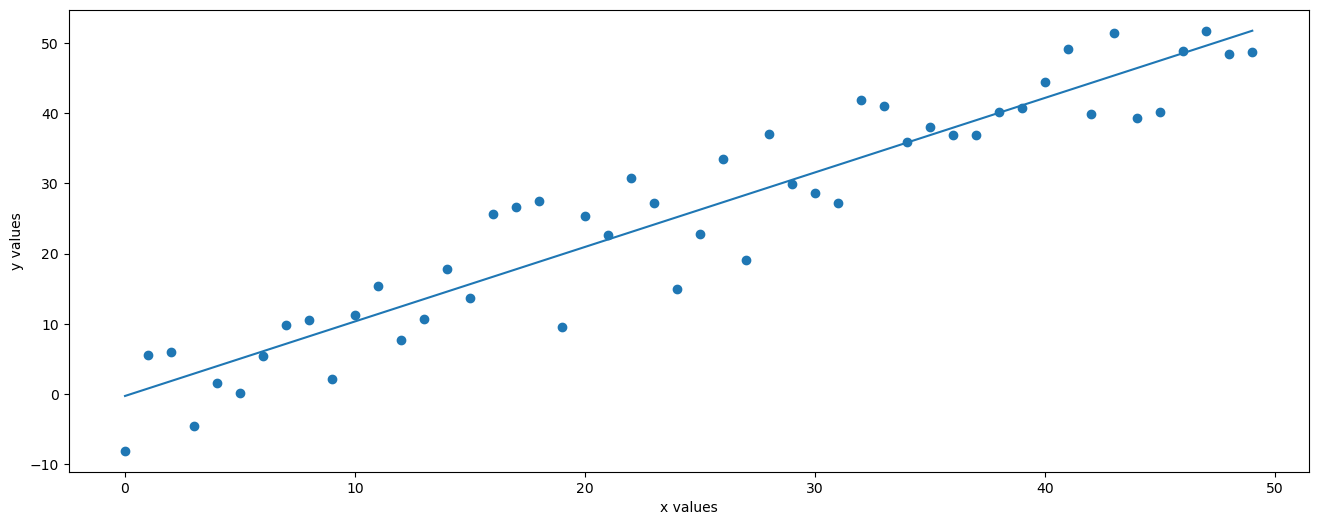

In [7]:
w = 0
b = 0
b,w = grad_descent(x,y,b,w)

m = x.shape[0]
pred_arr = []
for i in range(m):
    pred = b + w * x[i]
    pred_arr.append(pred)
    
plt.figure(figsize=(16,6))
plt.xlabel("x values")
plt.ylabel("y values")
plt.scatter(x,y)
plt.plot(x,pred_arr)
plt.show()

Seems like a good result. Let\'s try to reverse $y$ values and look at the result: 

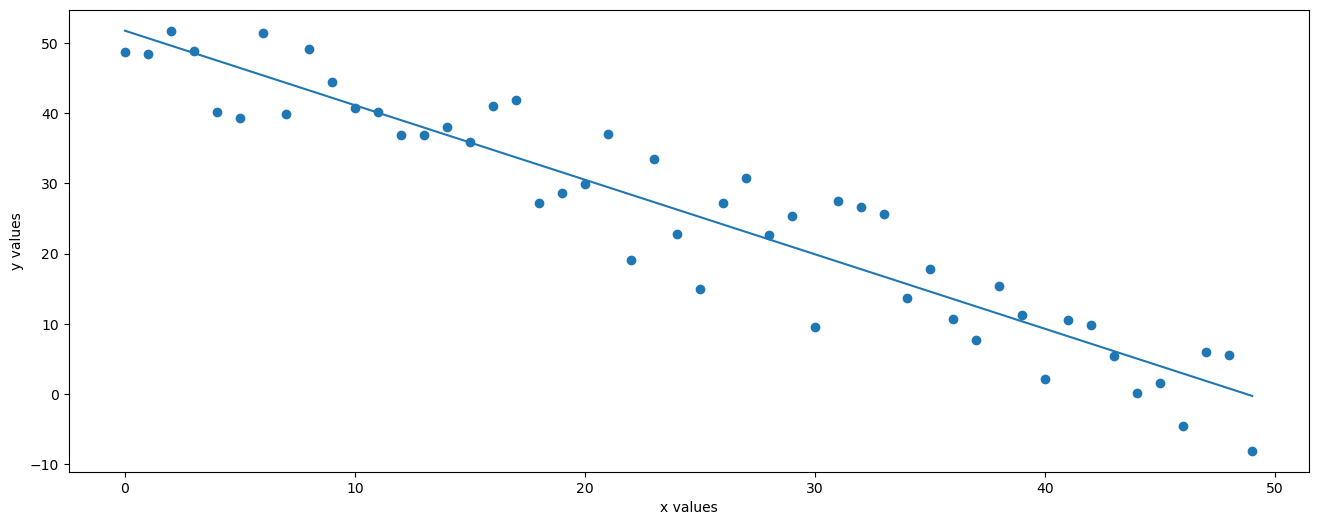

In [8]:
y = np.flip(y)
b,w = grad_descent(x,y,b,w)

m = x.shape[0]
pred_arr = []
for i in range(m):
    pred = b + w * x[i]
    pred_arr.append(pred)
    
plt.figure(figsize=(16,6))
plt.xlabel("x values")
plt.ylabel("y values")
plt.scatter(x,y)
plt.plot(x,pred_arr)
plt.show()

Look\'s like it works properly. If someone will find any errors - I\'ll be grateful to see the remarks in the comments.